In [167]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



In [168]:
corpus = open('sample_corpus.txt', 'r', encoding='utf8').read()

In [169]:
print(corpus)

Я всегда любил зиму. 
Помнится, наигравшись вдоволь во дворе, я прибегал домой и отогревался у камина.
Пока за окном бушевала вьюга, я сидел в широком отцовском кресле, вытянув ноги к огню.
В руках глиняная кружка, из которой я медленно, наслаждаясь каждым глотком, цедил мамин медовый отвар.
Любуясь красно-рыжими язычками пламени, мерно подрагивавшими в очаге и дарившими покой и защиту.
Но, увы, все это было в другой жизни.
За последние несколько дней мое отношение к зиме кардинально изменилось.
Собачий холод, глубокие сугробы, пробирающий до мозга кости ветер – я ненавидел зиму.
Ближе к полудню мы спустились в долину и уже по мелколесью продолжили путь на запад.
Каждые два-три часа мне приходилось объявлять привал.
Сугробы выше колена и сильный ветер довольно быстро опустошали мой источник энергии.
На первом привале хотел было глотнуть зелья насыщения, но, понаблюдав за работой «регенерации», пришел к выводу, что тело само прекрасно справляется.
Пока я, словно старая черепаха, медленн

In [170]:
corpus = re.sub(r'[\d\t,.?!-]','',corpus).split('\n')
print(corpus[:10])

['Я всегда любил зиму ', 'Помнится наигравшись вдоволь во дворе я прибегал домой и отогревался у камина', 'Пока за окном бушевала вьюга я сидел в широком отцовском кресле вытянув ноги к огню', 'В руках глиняная кружка из которой я медленно наслаждаясь каждым глотком цедил мамин медовый отвар', 'Любуясь краснорыжими язычками пламени мерно подрагивавшими в очаге и дарившими покой и защиту', 'Но увы все это было в другой жизни', 'За последние несколько дней мое отношение к зиме кардинально изменилось', 'Собачий холод глубокие сугробы пробирающий до мозга кости ветер – я ненавидел зиму', 'Ближе к полудню мы спустились в долину и уже по мелколесью продолжили путь на запад', 'Каждые дватри часа мне приходилось объявлять привал']


In [171]:
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)
print(tokenized_corpus)

[['Я', 'всегда', 'любил', 'зиму'], ['Помнится', 'наигравшись', 'вдоволь', 'во', 'дворе', 'я', 'прибегал', 'домой', 'и', 'отогревался', 'у', 'камина'], ['Пока', 'за', 'окном', 'бушевала', 'вьюга', 'я', 'сидел', 'в', 'широком', 'отцовском', 'кресле', 'вытянув', 'ноги', 'к', 'огню'], ['В', 'руках', 'глиняная', 'кружка', 'из', 'которой', 'я', 'медленно', 'наслаждаясь', 'каждым', 'глотком', 'цедил', 'мамин', 'медовый', 'отвар'], ['Любуясь', 'краснорыжими', 'язычками', 'пламени', 'мерно', 'подрагивавшими', 'в', 'очаге', 'и', 'дарившими', 'покой', 'и', 'защиту'], ['Но', 'увы', 'все', 'это', 'было', 'в', 'другой', 'жизни'], ['За', 'последние', 'несколько', 'дней', 'мое', 'отношение', 'к', 'зиме', 'кардинально', 'изменилось'], ['Собачий', 'холод', 'глубокие', 'сугробы', 'пробирающий', 'до', 'мозга', 'кости', 'ветер', '–', 'я', 'ненавидел', 'зиму'], ['Ближе', 'к', 'полудню', 'мы', 'спустились', 'в', 'долину', 'и', 'уже', 'по', 'мелколесью', 'продолжили', 'путь', 'на', 'запад'], ['Каждые', 'дватр

In [172]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

In [173]:
word2idx

{'«выносливость»': 233,
 '«регенерации»': 120,
 '«силу»': 232,
 '«совсем': 182,
 'Баг': 253,
 'Ближе': 81,
 'В': 30,
 'Видя': 147,
 'Все': 212,
 'Его': 181,
 'За': 61,
 'И': 252,
 'Каждые': 93,
 'Коекак': 240,
 'Любуясь': 44,
 'Маленькие': 290,
 'Ми': 136,
 'Мне': 258,
 'Мои': 261,
 'На': 110,
 'Невысокая': 287,
 'Необходимо': 230,
 'Но': 54,
 'Обжора': 142,
 'Пока': 16,
 'Помнится': 4,
 'Правда': 206,
 'Причем': 165,
 'Сегодня': 269,
 'Собачий': 70,
 'Солнце': 172,
 'Сугробы': 100,
 'Это': 276,
 'Этот': 222,
 'Я': 0,
 'близко»': 183,
 'бревенчатая': 279,
 'буду': 272,
 'буквальном': 195,
 'бушевала': 19,
 'бы': 217,
 'была': 277,
 'были': 292,
 'было': 58,
 'быстро': 105,
 'в': 22,
 'вдоволь': 6,
 'верхом': 137,
 'весть': 177,
 'ветер': 78,
 'вид': 289,
 'во': 7,
 'возможность': 239,
 'восстанавливала': 170,
 'впервые': 270,
 'вперед': 135,
 'все': 56,
 'всегда': 1,
 'всетаки': 241,
 'выбранное': 249,
 'выводу': 122,
 'выпадет': 237,
 'выполнял': 139,
 'вытянув': 26,
 'выше': 101,
 'в

In [174]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array

In [136]:
idx_pairs[:10]

array([[0, 1],
       [0, 2],
       [1, 0],
       [1, 2],
       [1, 3],
       [2, 0],
       [2, 1],
       [2, 3],
       [3, 1],
       [3, 2]])

In [175]:
def get_input_layer(words_idx):
    x = torch.zeros(words_idx.shape[0], vocabulary_size).float()
    x[list(range(0, words_idx.shape[0])), words_idx] = 1.
    return x

In [185]:
embedding_dims = 5

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_line = nn.Linear(vocabulary_size, embedding_dims)
        self.output_line = nn.Linear(embedding_dims, vocabulary_size)
        
    def forward(self, X):
        X = F.relu(self.input_line(X))
        return F.softmax(self.output_line(X))


In [177]:
eta = 0.001
epochs = 1010
model = MyModule()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=eta)

In [180]:
losses = []
batch_size = 59
for epoch in range(epochs):
  loss_val = []
  for batch in range(0,idx_pairs.shape[0], batch_size):
    x = get_input_layer(idx_pairs[batch:batch+batch_size, 0])
    target = torch.from_numpy(np.array([idx_pairs[batch:batch+batch_size, 1]]))

    y = model(x)
    loss = loss_function(y, target.view(-1))
    loss_val.append(loss.item())
    loss.backward()
    optimizer.step()

    model.zero_grad()

  losses.append(np.mean(loss_val))
  if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {np.mean(loss_val)}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


Loss at epo 0: 5.473080960187045
Loss at epo 0: 5.4729530811309814
Loss at epo 0: 5.472832744771784
Loss at epo 0: 5.472713427110151
Loss at epo 0: 5.4725965369831435
Loss at epo 0: 5.472486864436757
Loss at epo 0: 5.472374460913918
Loss at epo 0: 5.472268906506625
Loss at epo 0: 5.472159667448564
Loss at epo 0: 5.472057104110718
Loss at epo 0: 5.471952828493985
Loss at epo 0: 5.471855727109042
Loss at epo 0: 5.471755136143077
Loss at epo 0: 5.471660592339256
Loss at epo 0: 5.471562537279996
Loss at epo 0: 5.471467451615767
Loss at epo 0: 5.471374251625755
Loss at epo 0: 5.47128024968234
Loss at epo 0: 5.471189260482788
Loss at epo 0: 5.471098921515725
Loss at epo 0: 5.471011551943692
Loss at epo 0: 5.4709249626506455
Loss at epo 0: 5.470834883776578
Loss at epo 0: 5.470746408809315
Loss at epo 0: 5.470660708167336
Loss at epo 0: 5.470575744455511
Loss at epo 0: 5.470492514696988
Loss at epo 0: 5.470412015914917
Loss at epo 0: 5.470326098528775
Loss at epo 0: 5.470243562351573
Loss at 

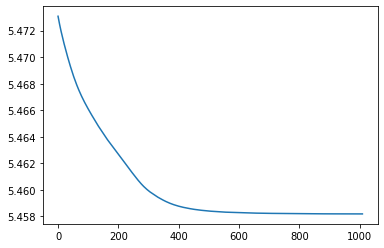

In [181]:
plt.plot(list(range(0,epochs, 1)), losses)

In [187]:
preds = np.ones((len(idx2word), embedding_dims))
for idx, i in enumerate(idx2word.keys()):
  x = get_input_layer(np.array([i]))
  out = model.input_line(x)
  preds[idx] = out.detach()

In [188]:
print(preds)

[[-6.14213943e-03  5.26002693e+00  3.01512623e+00  2.21504831e+00
  -2.77471542e-03]
 [ 3.01991463e-01  4.54557848e+00  5.77103233e+00 -4.41288948e-03
  -6.92939758e-03]
 [-6.65330887e-03  5.03595209e+00  4.00385952e+00  8.58887911e-01
  -6.04104996e-03]
 ...
 [ 5.18169022e+00 -1.27649307e-03  6.41619968e+00  7.10349321e+00
  -1.75027847e-02]
 [ 8.17948532e+00  8.23335266e+00  8.31235123e+00  7.37201786e+00
   8.27557564e-01]
 [ 7.51779270e+00  7.69084740e+00  7.63843918e+00  6.73666763e+00
   7.52858162e-01]]
